In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date

from sklearn.preprocessing import StandardScaler


%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy.sparse 
import lightgbm 
import gc

import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import gc
import pickle

In [2]:
from google.cloud import storage

from io import BytesIO

client = storage.Client()

bucket = client.get_bucket("ieee-kaggle-fraud")

blob = bucket.blob("train_transaction.csv")

content = blob.download_as_string()

train_transaction_data = pd.read_csv(BytesIO(content))

In [3]:
train_transaction_data.card6.unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

In [4]:
train_transaction_data=train_transaction_data[train_transaction_data.card6!='debit or credit']

In [5]:
train_transaction_data.shape

(590510, 394)

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
#def int_16_convert(df):
 #   for i in range(len(df.columns)):
  #      if df.dtypes[i]=='float64':
   #         df.iloc[:,i]=df.iloc[:,i].astype(np.float16)
   # elif df.dtypes[i]=='int64':
    #        df.iloc[:,i]=df.iloc[:,i].astype(np.int16)
    #return df

In [8]:
#train_transaction_skinny_data=int_16_convert(train_transaction_data)

In [9]:
#train_transaction_skinny_data.dtypes

In [10]:
#del(train_transaction_data)
#gc.collect()

In [11]:
train_transaction_data=pd.get_dummies(train_transaction_data)

In [12]:
X=train_transaction_data.drop(['isFraud'], axis=1)
y=train_transaction_data['isFraud']

In [3]:
del(train_transaction_data)
gc.collect()

265

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(
X, y, test_size=0.2, random_state=42)

In [15]:
import time
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [16]:
X_train.shape

(472408, 529)

In [17]:
ts = time.time()

model = XGBClassifier(
    max_depth=8,
    n_estimators=500,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    objective='binary:logistic',
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric='error', 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-error:0.031022	validation_1-error:0.031168
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.030086	validation_1-error:0.030338
[2]	validation_0-error:0.03091	validation_1-error:0.031007
[3]	validation_0-error:0.031062	validation_1-error:0.031168
[4]	validation_0-error:0.030635	validation_1-error:0.030736
[5]	validation_0-error:0.030414	validation_1-error:0.030575
[6]	validation_0-error:0.030218	validation_1-error:0.030423
[7]	validation_0-error:0.029917	validation_1-error:0.030254
[8]	validation_0-error:0.029832	validation_1-error:0.030008
[9]	validation_0-error:0.029654	validation_1-error:0.029957
[10]	validation_0-error:0.029566	validation_1-error:0.029847
[11]	validation_0-error:0.029563	validation_1-error:0.029805
[12]	validation_0-error:0.02946	validation_1-error:0.02972
[13]	validation_0-error:0.029419	validation_1-error:0.02959

[132]	validation_0-error:0.024293	validation_1-error:0.024784
[133]	validation_0-error:0.024269	validation_1-error:0.024758
[134]	validation_0-error:0.024271	validation_1-error:0.024741
[135]	validation_0-error:0.024223	validation_1-error:0.024758
[136]	validation_0-error:0.024223	validation_1-error:0.024758
[137]	validation_0-error:0.024212	validation_1-error:0.024758
[138]	validation_0-error:0.024176	validation_1-error:0.024741
[139]	validation_0-error:0.024163	validation_1-error:0.024733
[140]	validation_0-error:0.02414	validation_1-error:0.024699
[141]	validation_0-error:0.024106	validation_1-error:0.024691
[142]	validation_0-error:0.024106	validation_1-error:0.024665
[143]	validation_0-error:0.0241	validation_1-error:0.024648
[144]	validation_0-error:0.024068	validation_1-error:0.024648
[145]	validation_0-error:0.024043	validation_1-error:0.024631
[146]	validation_0-error:0.024036	validation_1-error:0.02464
[147]	validation_0-error:0.023998	validation_1-error:0.024597
[148]	valida

3918.619406223297

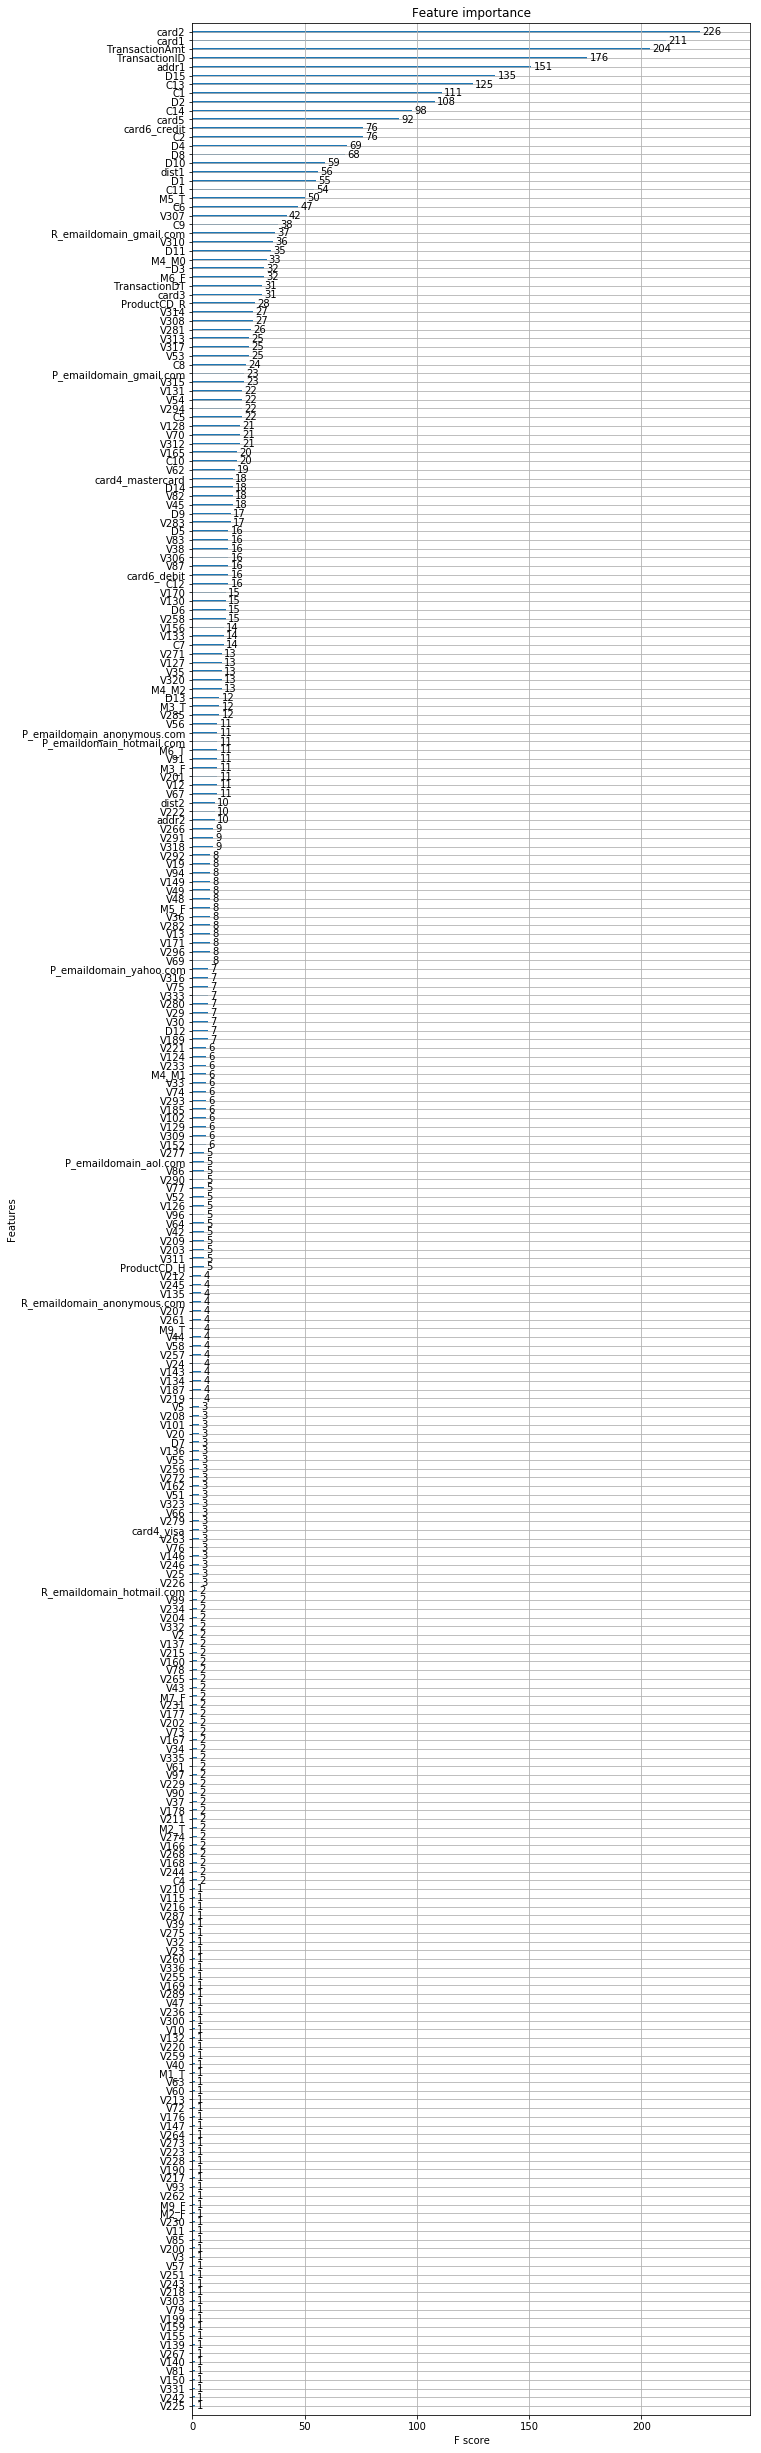

In [18]:
plot_features(model, (10,44))

In [19]:

pickle.dump(model, open("ieee.pickle.dat", "wb"))

In [ ]:
del(X_train)
del(y_train)
del(X_valid)
del(y_valid)
gc.collect()

In [18]:
from google.cloud import storage

from io import BytesIO

client = storage.Client()

bucket = client.get_bucket("ieee-kaggle-fraud")

blob = bucket.blob("test_transaction.csv")

content = blob.download_as_string()

test_transaction_data = pd.read_csv(BytesIO(content))

In [7]:
model = pickle.load(open("ieee.pickle.dat", "rb"))

In [8]:
test_transaction_data.TransactionID.nunique()

506691

In [ ]:
#test_transaction_skinny_data=int_16_convert(test_transaction_data)
#del(test_transaction_data)
#gc.collect()

In [9]:
test_transaction_data=test_transaction_data[test_transaction_data.P_emaildomain!='scranton.edu']

In [10]:
test_transaction_data=pd.get_dummies(test_transaction_data)

In [11]:
test_transaction_data.columns[300:400]

Index(['V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278',
       'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287',
       'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296',
       'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305',
       'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314',
       'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323',
       'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332',
       'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'ProductCD_C',
       'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W',
       'card4_american express', 'card4_discover', 'card4_mastercard',
       'card4_visa', 'card6_charge card', 'card6_credit', 'card6_debit',
       'P_emaildomain_aim.com', 'P_emaildomain_anonymous.com',
       'P_emaild

In [12]:
test_transaction_data.shape

(506689, 529)

In [13]:
Y_test = model.predict(test_transaction_data)

/home/meetshah31094/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
test_transaction_data.TransactionID.nunique()

506689

In [15]:
test_transaction_data.shape

(506689, 529)

In [16]:
submission = pd.DataFrame({
    "TransactionID": test_transaction_data.TransactionID, 
    "isFraud": Y_test
})

In [ ]:
submission.head()

In [17]:
submission.to_csv('ieee_fraud_submission_01.csv',index=False)

In [22]:
test_transaction_data_id=pd.Dataframe(test_transaction_data[test_transaction_data.P_emaildomain=='scranton.edu']['TransactionID'])

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [20]:
test_transaction_data_id

480814    4144363
480819    4144368
Name: TransactionID, dtype: int64

In [24]:
submission_1 = pd.DataFrame({
    "TransactionID": test_transaction_data[test_transaction_data.P_emaildomain=='scranton.edu']['TransactionID'], 
    "isFraud": 0
})

In [25]:
submission=submission.append(submission_1)

In [26]:
submission.shape

(506691, 2)

In [27]:
submission.to_csv('ieee_fraud_submission_01.csv',index=False)